In [2]:
from neurotools.io.gdrive import download_sheets_doc
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
words_id = '1o3UZk__RDSu8f60z5QNhM9AYNp4Qf4Wox5SEM3ZbM3M'
words_sheet = download_sheets_doc(words_id, has_column_labels=True)

In [7]:
innovation_reco = words_sheet['innovative_reco']
good_reco = words_sheet['good_reco']
# complete = words_sheet['complete_word_list']

In [11]:
innovation_reco = innovation_reco[innovation_reco['Selected'] == '1']
good_reco = good_reco[good_reco['Selected'] == '1']
# candidates = complete[complete['Select'] == '1']

In [7]:
def query_channel_ptype(channel, ptype, level):
    focus_col = [x for x in candidates.columns if channel in x and ptype in x][0]
    filter_cols =[x for x in candidates.columns if channel in x and 'in' in x]
    filter_cols.sort()
    if ptype == 'innovation':
        filtered_df = candidates[(candidates[filter_cols[0]] == '1') & (candidates[filter_cols[1]] == '0')]
    elif ptype == 'good':
        filtered_df = candidates[(candidates[filter_cols[0]] == '0') & (candidates[filter_cols[1]] == '1')]   
    elif ptype == 'overall':
        filtered_df = candidates[(candidates[filter_cols[0]] == '1') & (candidates[filter_cols[1]] == '1')]   
    filtered_df = filtered_df[['word'] + [focus_col]]
    filtered_df[focus_col] = filtered_df[focus_col].astype(float)
    if level == 'good':
        return filtered_df[filtered_df[focus_col] > 0.3]
    elif level == 'bad':
        return filtered_df[filtered_df[focus_col] < -0.3]
    elif level == 'neutral':
        return filtered_df[(filtered_df[focus_col] <= 0.3) & (filtered_df[focus_col] >= -0.3)]
    elif level == 'reco':
        if ptype == 'innovation':
            return innovation_reco[['word', 'weighted']]
        elif ptype == 'good':
            return good_reco[['word', 'weighted']]
        elif ptype == 'overall':
            return pd.concat([innovation_reco[['word', 'weighted']], good_reco[['word', 'weighted']]], ignore_index=True)

In [34]:
def my_tf_color_func(dictionary, level):
    maxval = max(dictionary.values())
    minval = min(dictionary.values())
    def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
        if (len(dictionary) > 1) or (minval != maxval):
            value = (dictionary[word] - minval) / (maxval - minval)
        else:
            value = 1
        if level == 'Feel Good' or level == 'Innovative':
            return "#BCF51B"
        elif level == 'good':
            return "rgb(34,139,34)"
        elif level == 'neutral':
            return "rgb(220,220,220)"
        elif level == 'bad':
            return "#D3D4D2"       
    return my_tf_color_func_inner

In [32]:
color_dict = {
    'good': "#228B22",
    'bad': "#FF0000",
    'neutral': "#DCDCDC",
    'Feel Good': "#2dffff",
    'Innovative': "#2dffff"
}
order_dict = {
    'Feel Good' : 1,
    'Innovative' : 1,
    'good' : 2,
#     'neutral': 3,
    'bad' : 3
}

In [52]:
def plot_wordclouds(x, level, fig):
    words = x.iloc[:,0].values
    x.iloc[:,1] = x.iloc[:,1].astype(float)
    unnormalized_scores = x.iloc[:,1].values
#     fig = plt.figure(figsize=(10,20))
#     plt.subplot(1, 3, order_dict[level])
    ax1 = plt.gca()
    ax1.axis("off");
    # scale correlations to 1:20
    if min(unnormalized_scores) == max(unnormalized_scores):
        scores = np.array([5]*len(words))
    else:
        scores = 9*(unnormalized_scores-min(unnormalized_scores))/(max(unnormalized_scores)-min(unnormalized_scores))+1
    freqs = dict(zip(words, scores))

    wordcloud = WordCloud(width=1000, height=1800, background_color=None, mode = 'RGBA', prefer_horizontal=1, color_func=my_tf_color_func(freqs, level)).generate_from_frequencies(freqs, max_font_size=100)
    ax1.set_title(level.title(), color = 'black', size=70, y=1.02)
    ax1.imshow(wordcloud, interpolation='bilinear')


In [25]:
import numpy as np

In [14]:
import itertools

In [15]:
channels = ['FB', 'IG']
ptypes = ['innovation', 'good', 'overall']

In [16]:
combs = list(itertools.product(channels, ptypes))

In [17]:
good

NameError: name 'good' is not defined

In [18]:
for channel, ptype in combs:# [('IG', 'innovation')]:
    print(channel, ptype)
    good = query_channel_ptype(channel, ptype, 'good')
    bad = query_channel_ptype(channel, ptype, 'bad')
#     neutral = query_channel_ptype(channel, ptype, 'neutral')
    reco = query_channel_ptype(channel, ptype, 'reco')

    fig = plt.figure(figsize=(70, 50))
    plot_wordclouds(reco, 'reco', fig)
    plot_wordclouds(good, 'good', fig)
#     plot_wordclouds(neutral, 'neutral', fig)
    plot_wordclouds(bad, 'bad', fig)
    fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
                    wspace=0.05, hspace=None)
    plt.savefig('../figs/wordcloud/wc_{}_{}.png'.format(channel, ptype), bbox_inches='tight')
    plt.clf()

FB migration


/Users/piocalderon/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


FB vegan
FB overall
IG migration


/Users/piocalderon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


IG vegan
IG overall


In [28]:
good_FB = query_channel_ptype('FB', 'overall', 'good')
bad_FB = query_channel_ptype('FB', 'overall', 'bad')
reco_FB = query_channel_ptype('FB', 'overall', 'reco')

good_FB.columns = ['word', 'score']
bad_FB.columns = ['word', 'score']
reco_FB.columns = ['word', 'score']

good_IG = query_channel_ptype('IG', 'overall', 'good')
bad_IG = query_channel_ptype('IG', 'overall', 'bad')
reco_IG = query_channel_ptype('IG', 'overall', 'reco')

good_IG.columns = ['word', 'score']
bad_IG.columns = ['word', 'score']
reco_IG.columns = ['word', 'score']

In [89]:
good_FB

word     score
12         abgeordnet  0.807916
70              aktiv  0.962061
81                all  0.483495
151             april  0.935773
163            ashoka  0.473040
175       aufeinander  0.455713
177        auffordern  0.819268
219        auslöffeln  0.883794
259              bahn  0.432711
326           beitrag  0.887379
327            beißen  0.497237
330          bekommen  0.693204
342      benandjerrys  0.578491
355          benjerry  0.563555
369            berlin  0.499029
409             bevor  0.424944
450               bit  0.377745
451             bitte  0.765497
464              blog  0.639432
488         botschaft  0.300075
494          brauchen  0.713518
502           bringen  0.741598
516     bundesstaaten  0.398058
517         bundestag  0.571322
526      businessidee  0.761016
527         busladung  0.666318
574            chance  0.457207
622           climate  0.774757
639               com  0.616729
650            cookie  0.909485
...               ...       ...
3391          städten  0.675280
3403           suchen  0.697386
3484            tauen  0.455713
3498           teilen  0.694399
3540     tiergerechte  0.375653
3554         together  0.338910
3571             tour  0.729052
3690   unterschriften  0.794175
3692     unterstützen  0.387304
3699               up  0.872442
3710              usa  0.406423
3787      verschenken  0.646004
3824         vielfalt  0.336221
3835             voll  0.601792
3840           vorbei  0.647199
3919              weg  0.378342
3944             weiß  0.883196
3951             welt  0.432114
3977            werte  0.776848
4010           winken  0.761016
4022          wirkung  0.608962
4026           wissen  0.801344
4034            woche  0.536669
4054  worldrefugeeday  0.338910
4095              yes  0.804332
4159        zugreifen  0.356833
4162          zukunft  0.503211
4163         zulässig  0.682151
4168   zusammenstehen  0.589843
4172          zutaten  0.896938

[188 rows x 2 columns]

In [44]:
good_FB

word     score
12         abgeordnet  0.807916
70              aktiv  0.962061
81                all  0.483495
151             april  0.935773
163            ashoka  0.473040
175       aufeinander  0.455713
177        auffordern  0.819268
219        auslöffeln  0.883794
259              bahn  0.432711
326           beitrag  0.887379
327            beißen  0.497237
330          bekommen  0.693204
342      benandjerrys  0.578491
355          benjerry  0.563555
369            berlin  0.499029
409             bevor  0.424944
450               bit  0.377745
451             bitte  0.765497
464              blog  0.639432
488         botschaft  0.300075
494          brauchen  0.713518
502           bringen  0.741598
516     bundesstaaten  0.398058
517         bundestag  0.571322
526      businessidee  0.761016
527         busladung  0.666318
574            chance  0.457207
622           climate  0.774757
639               com  0.616729
650            cookie  0.909485
...               ...       ...
3391          städten  0.675280
3403           suchen  0.697386
3484            tauen  0.455713
3498           teilen  0.694399
3540     tiergerechte  0.375653
3554         together  0.338910
3571             tour  0.729052
3690   unterschriften  0.794175
3692     unterstützen  0.387304
3699               up  0.872442
3710              usa  0.406423
3787      verschenken  0.646004
3824         vielfalt  0.336221
3835             voll  0.601792
3840           vorbei  0.647199
3919              weg  0.378342
3944             weiß  0.883196
3951             welt  0.432114
3977            werte  0.776848
4010           winken  0.761016
4022          wirkung  0.608962
4026           wissen  0.801344
4034            woche  0.536669
4054  worldrefugeeday  0.338910
4095              yes  0.804332
4159        zugreifen  0.356833
4162          zukunft  0.503211
4163         zulässig  0.682151
4168   zusammenstehen  0.589843
4172          zutaten  0.896938

[188 rows x 2 columns]

In [20]:
good = pd.concat([good_FB, good_IG], axis=0)
bad = pd.concat([bad_FB, bad_IG], axis=0)
reco = pd.concat([reco_FB, reco_IG], axis=0)

In [43]:
'klimagerechtigkeit' in bad.word.values

True

In [118]:
fig = plt.figure(figsize=(70, 50))
plot_wordclouds(reco, 'reco', fig)
plot_wordclouds(good, 'good', fig)
#     plot_wordclouds(neutral, 'neutral', fig)
plot_wordclouds(bad, 'bad', fig)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
                wspace=0.05, hspace=None)
plt.savefig('../figs/wordcloud/wc_{}_{}.png'.format('overall', 'overall'), bbox_inches='tight')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [19]:
igw = candidates[~candidates['IG_overall_score'].map(lambda x: 'not' in x)][['word','IG_overall_score']]

In [20]:
fbw = candidates[~candidates['FB_overall_score'].map(lambda x: 'not' in x)][['word','FB_overall_score']]

In [21]:
fbw.mean?

In [22]:
combsss=fbw.set_index('word').join(igw.set_index('word'), how='outer')

In [23]:
combsss['FB_overall_score'] = combsss['FB_overall_score'].astype(float)
combsss['IG_overall_score'] = combsss['IG_overall_score'].astype(float)

In [24]:
over = combsss.mean(axis=1).reset_index().iloc[1:,:]

In [25]:
over.columns =  ['word', 'score']

In [29]:
good = over[over['score'] > 0.3]
bad = over[over['score'] < -0.3]
reco = pd.concat([reco_FB, reco_IG], axis=0)

In [30]:
to_remove_from_reco_bad = set(reco.word.values).intersection(set(bad.word.values))

In [31]:
to_remove_from_reco_good = set(reco.word.values).intersection(set(good.word.values))

In [32]:
good = good.iloc[:1004]

In [33]:
bad = bad.iloc[:-3]

In [34]:
reco = reco[(~reco.word.isin(to_remove_from_reco_bad)) & (~reco.word.isin(to_remove_from_reco_good))]

In [35]:
fig = plt.figure(figsize=(70, 50))
plot_wordclouds(reco, 'reco', fig)
plot_wordclouds(good, 'good', fig)
#     plot_wordclouds(neutral, 'neutral', fig)
plot_wordclouds(bad, 'bad', fig)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
                wspace=0.05, hspace=None)
plt.savefig('../figs/wordcloud/wc_{}_{}.png'.format('overall_2', 'overall_2'), bbox_inches='tight')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


{'arbeit', 'bewegen', 'gemeinschaft', 'verändern'}

In [18]:
good = good_reco[['word', 'weighted']]
innovative = innovation_reco[['word', 'weighted']]

/Users/piocalderon/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


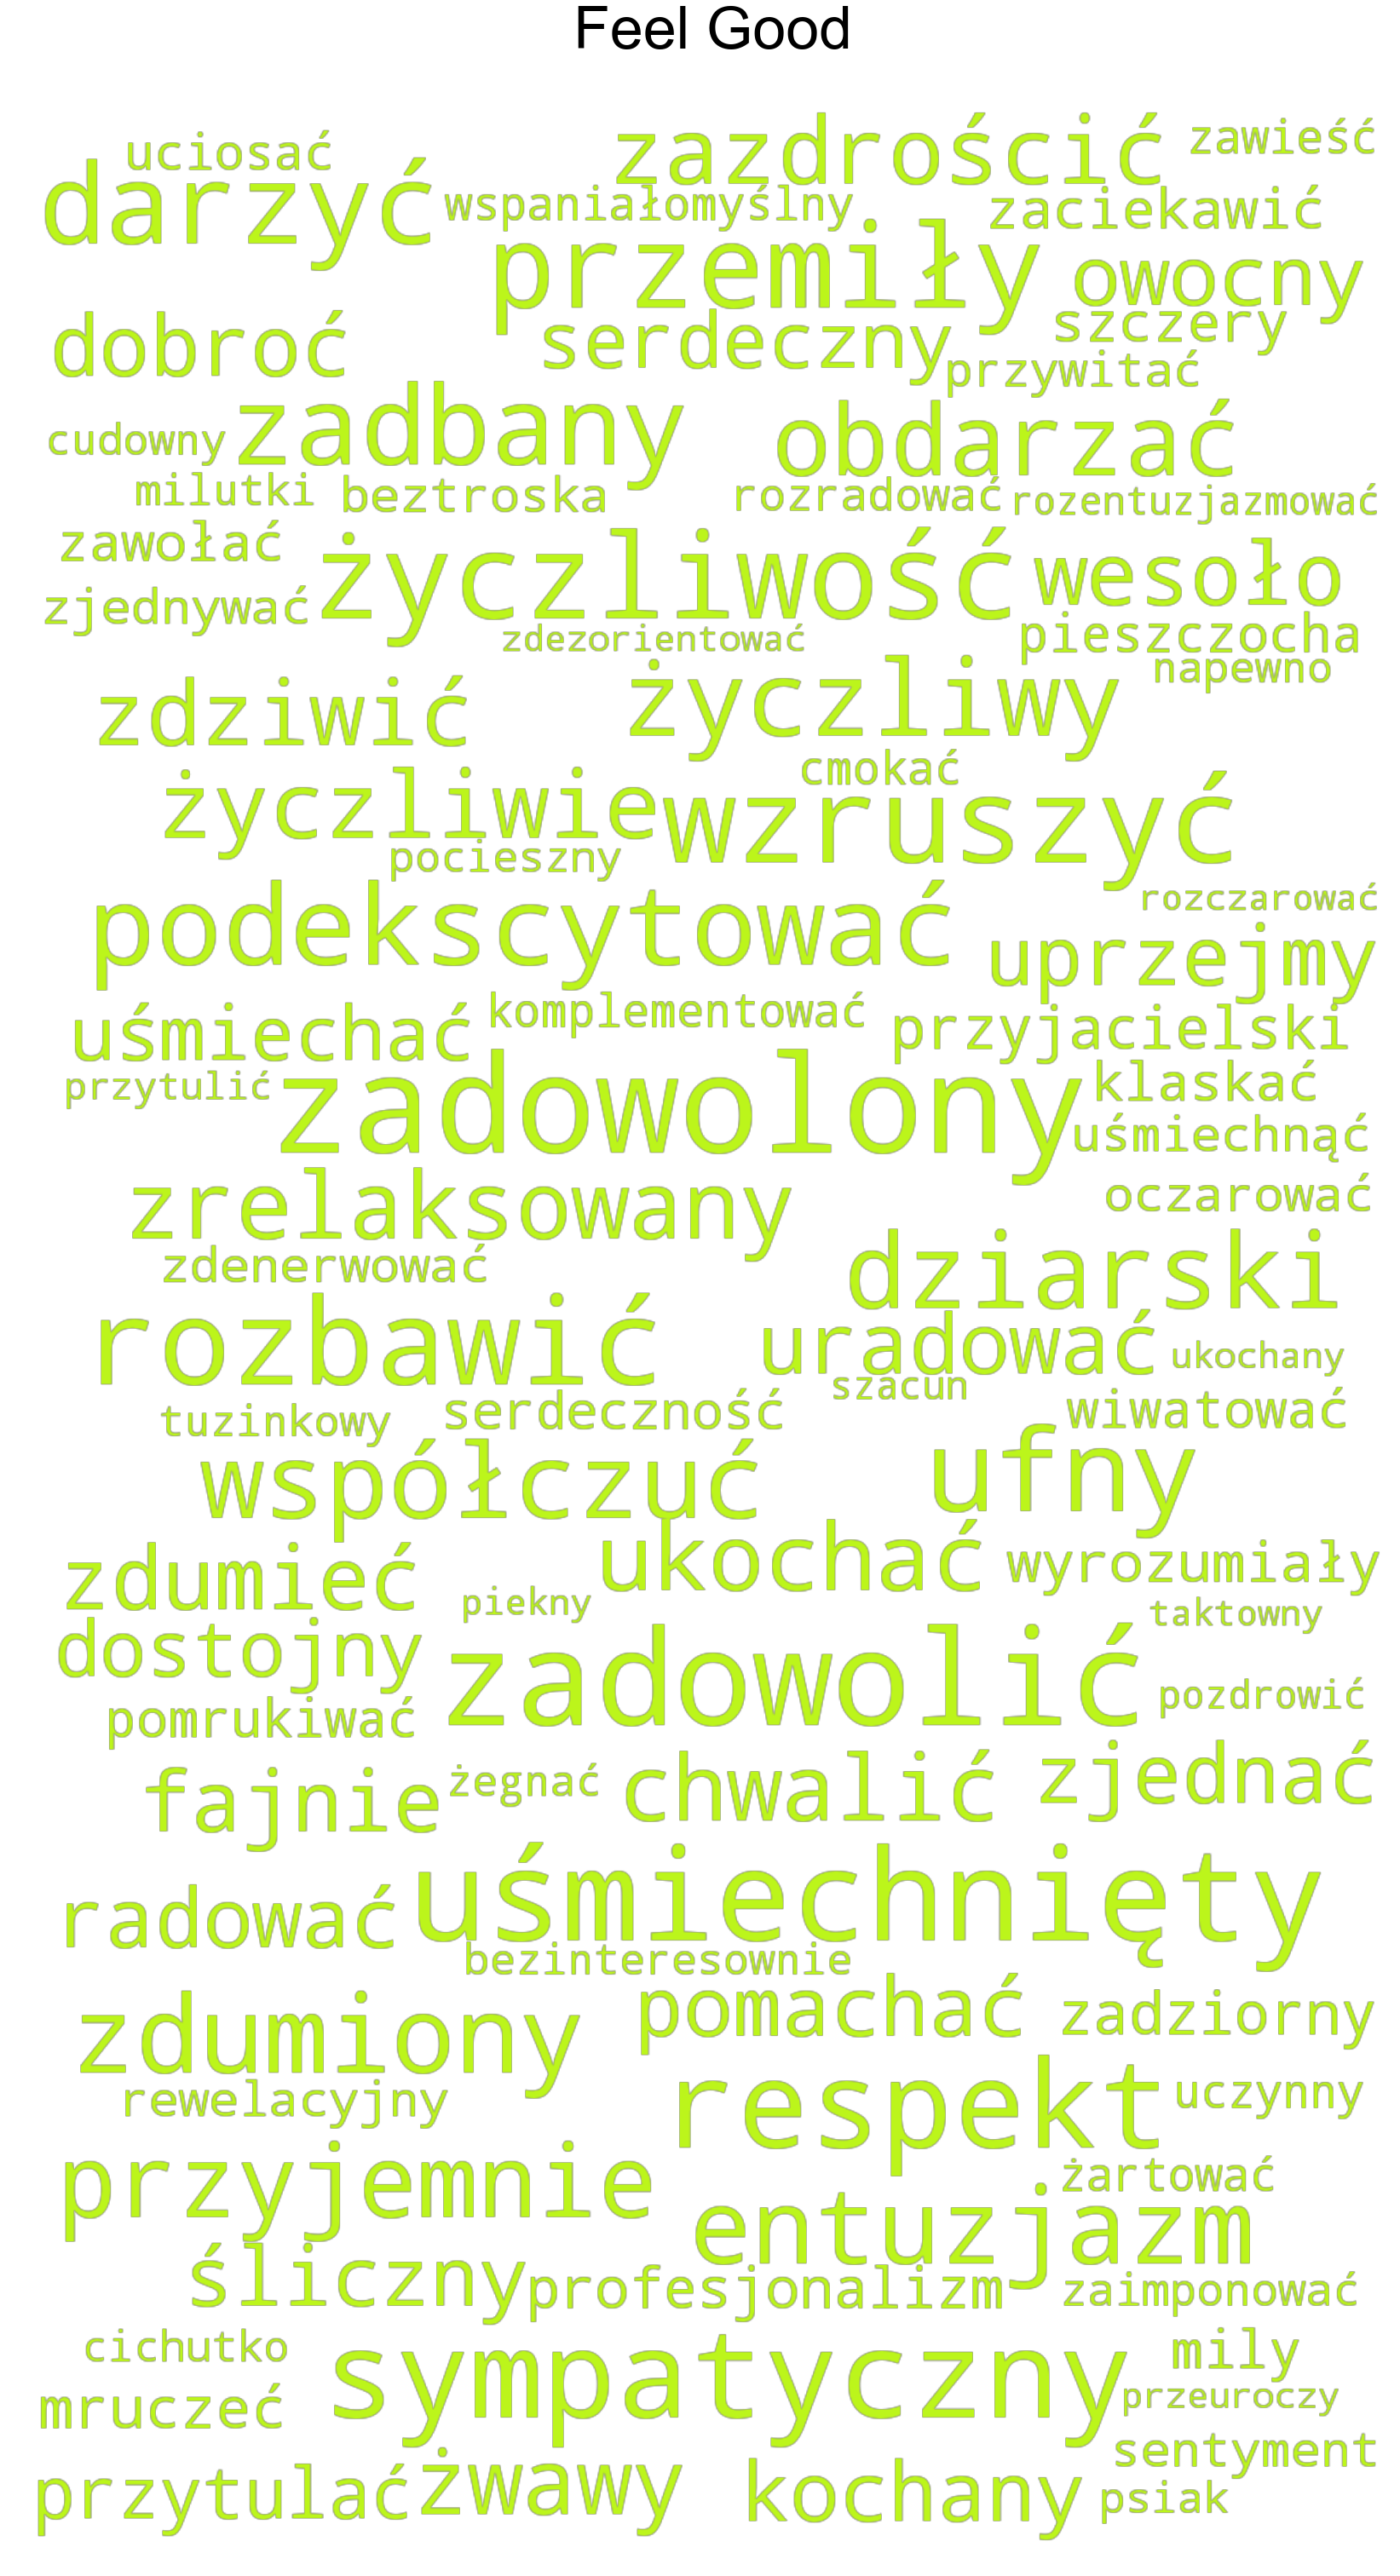

In [59]:
fig = plt.figure(figsize=(30,50))
plot_wordclouds(good, 'Feel Good', fig)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
                wspace=0.05, hspace=None)
plt.savefig('../figs/wc_{}.png'.format('reco_feel_good', bbox_inches='tight'))

/Users/piocalderon/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


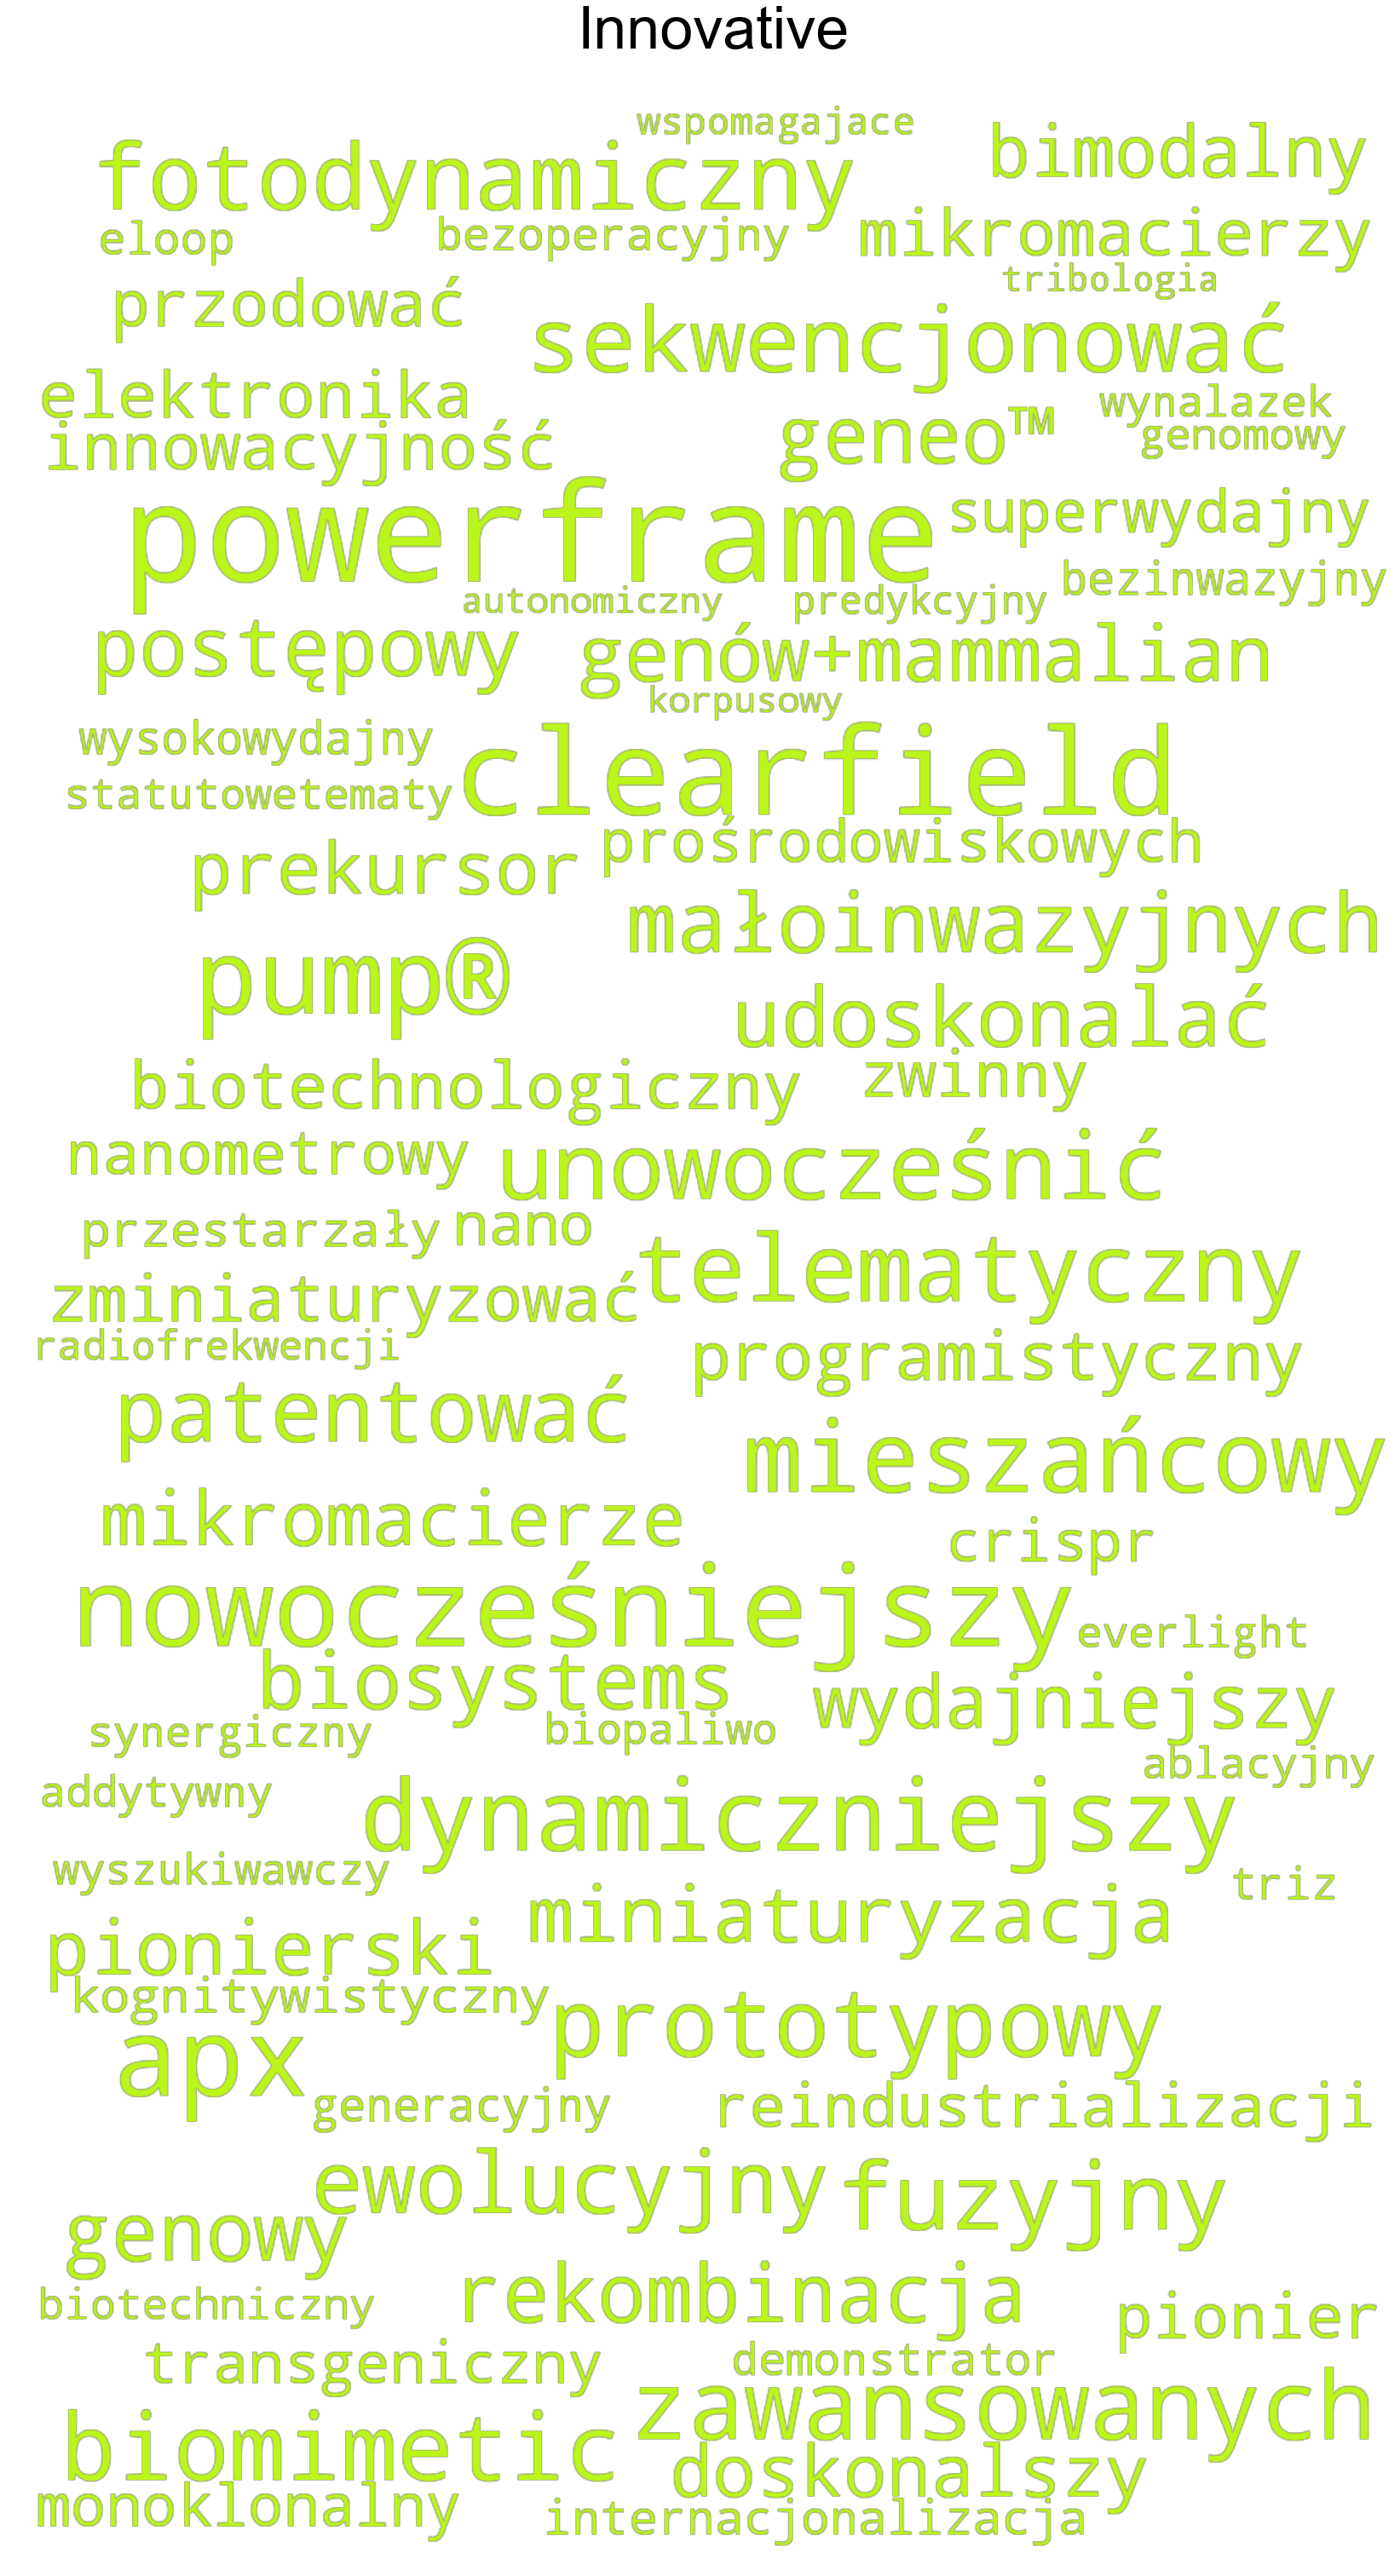

In [60]:
fig = plt.figure(figsize=(30,50))
plot_wordclouds(innovative, 'Innovative', fig)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
                wspace=0.05, hspace=None)
plt.savefig('../figs/wc_{}.png'.format('reco_innovative', bbox_inches='tight'))

In [29]:
fig = plt.figure(figsize=(70, 50))
plot_wordclouds(reco, 'reco', fig)
plot_wordclouds(good, 'good', fig)
#     plot_wordclouds(neutral, 'neutral', fig)
plot_wordclouds(bad, 'bad', fig)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
                wspace=0.05, hspace=None)
plt.savefig('../figs/wordcloud/wc_{}_{}.png'.format('overall_2', 'overall_2'), bbox_inches='tight')


NameError: name 'reco' is not defined